In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

np.random.seed(52)


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
df = df.drop('customerID', axis=1)

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [8]:
le = LabelEncoder()

In [9]:
for n in object_columns:
    df[n] = le.fit_transform(df[n])

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [11]:
df.dtypes.value_counts()

int32      17
int64       2
float64     1
Name: count, dtype: int64

In [12]:
any_match = df[df.isin(['NaN']).any(axis=1)]
print(any_match)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [13]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
gender,0.0,0.0
SeniorCitizen,0.0,0.0
Partner,0.0,0.0
Dependents,0.0,0.0
tenure,0.0,0.0
PhoneService,0.0,0.0
MultipleLines,0.0,0.0
InternetService,0.0,0.0
OnlineSecurity,0.0,0.0
OnlineBackup,0.0,0.0


In [14]:
count_y = (df['Churn'] == 'Yes').sum()
count_n = (df['Churn'] == 'No').sum()


print(f"Количество 'Yes': {count_y}")
print(f"Количество 'No': {count_n}")

Количество 'Yes': 0
Количество 'No': 0


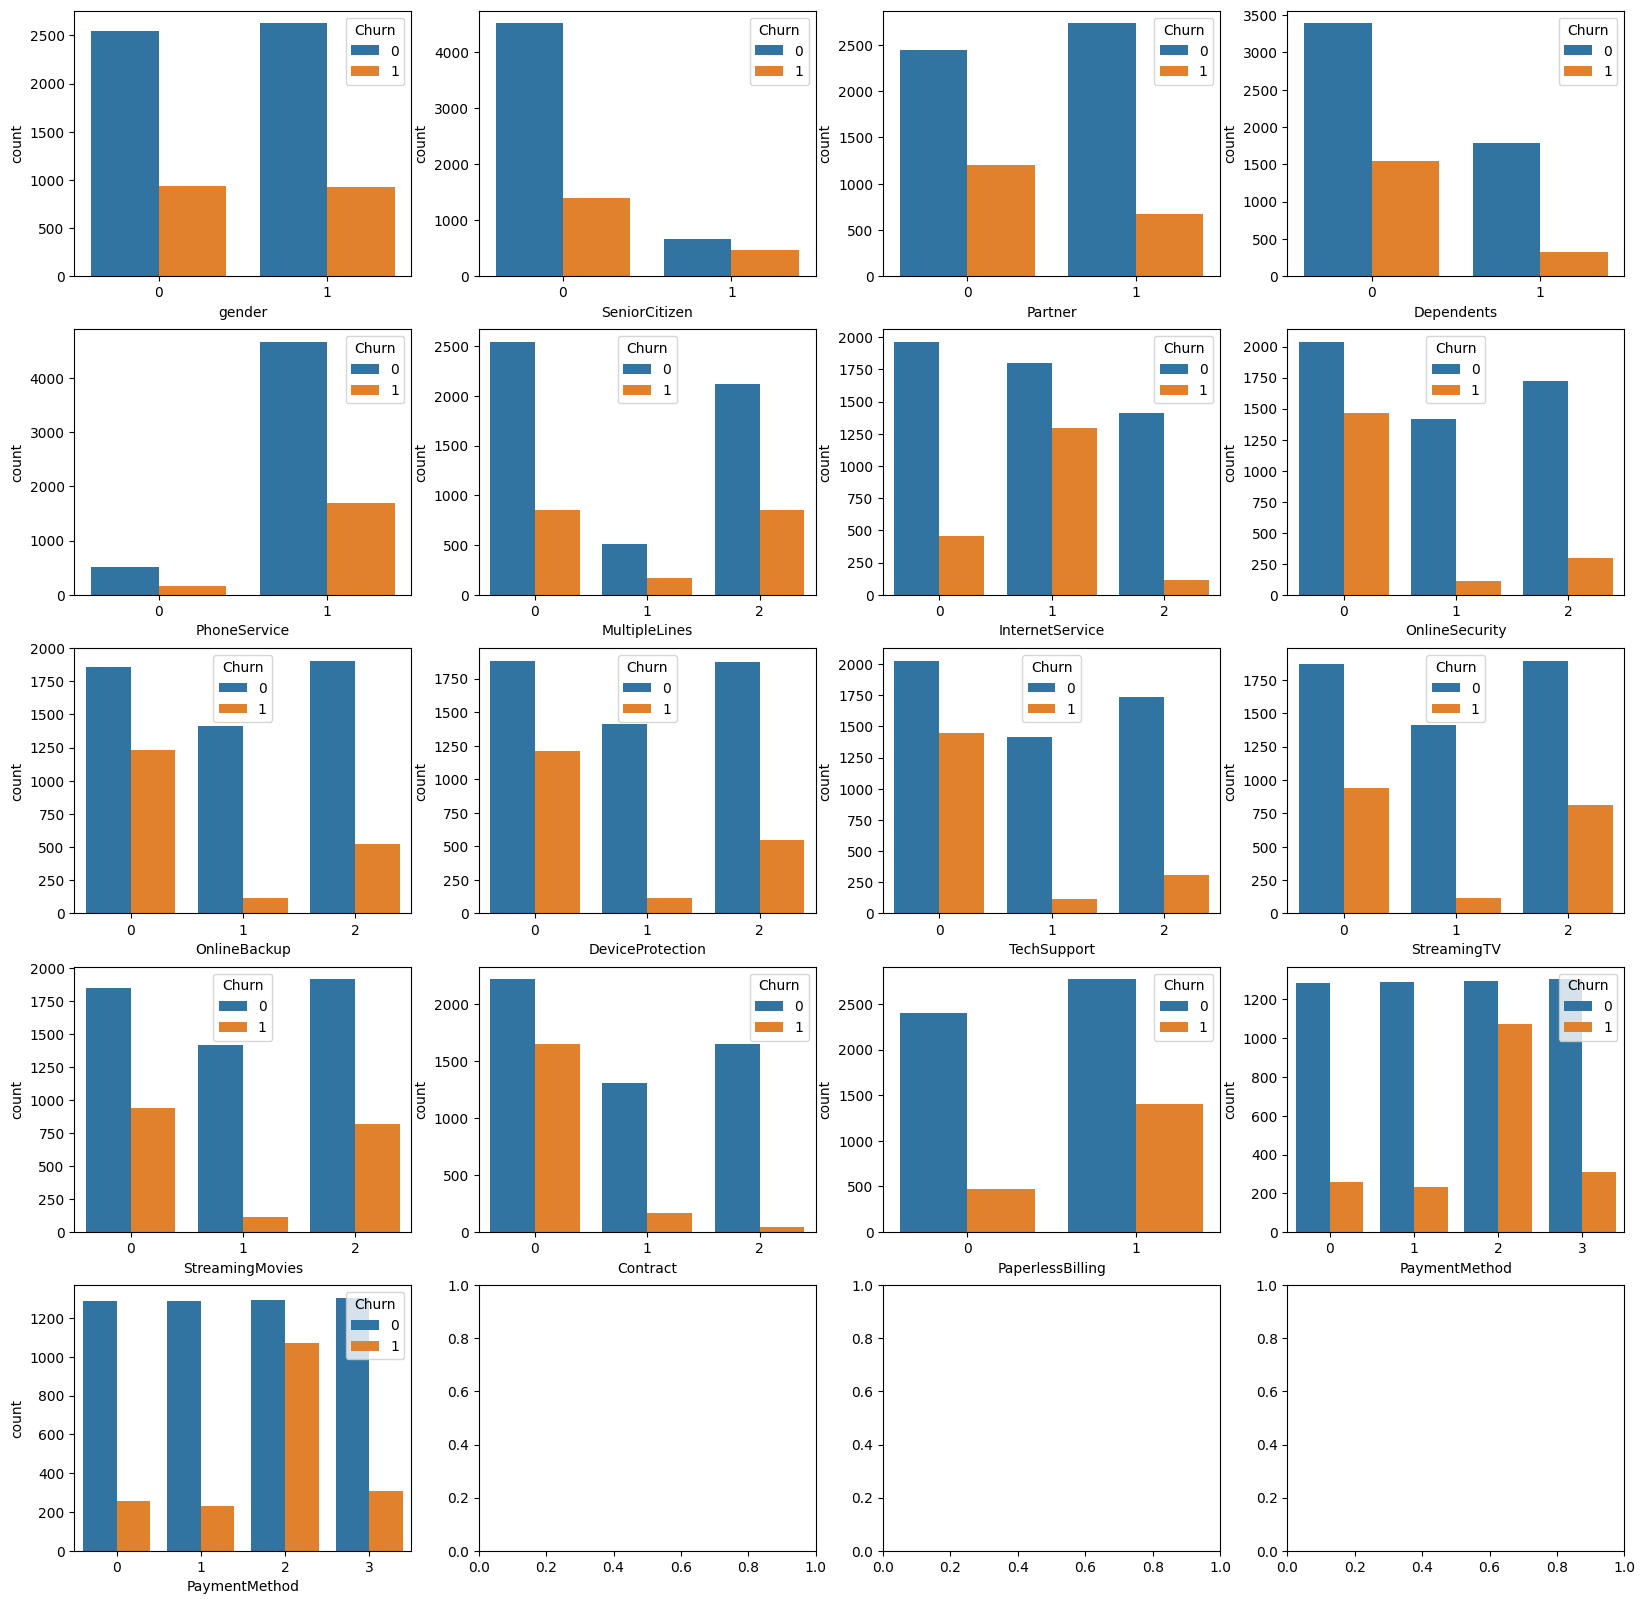

In [35]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

columns = ['gender','SeniorCitizen', 'Partner', 'Dependents', 
           'PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'PaymentMethod']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.countplot(data=df, x=col, hue='Churn',ax=axs[row, col_idx])

plt.show()

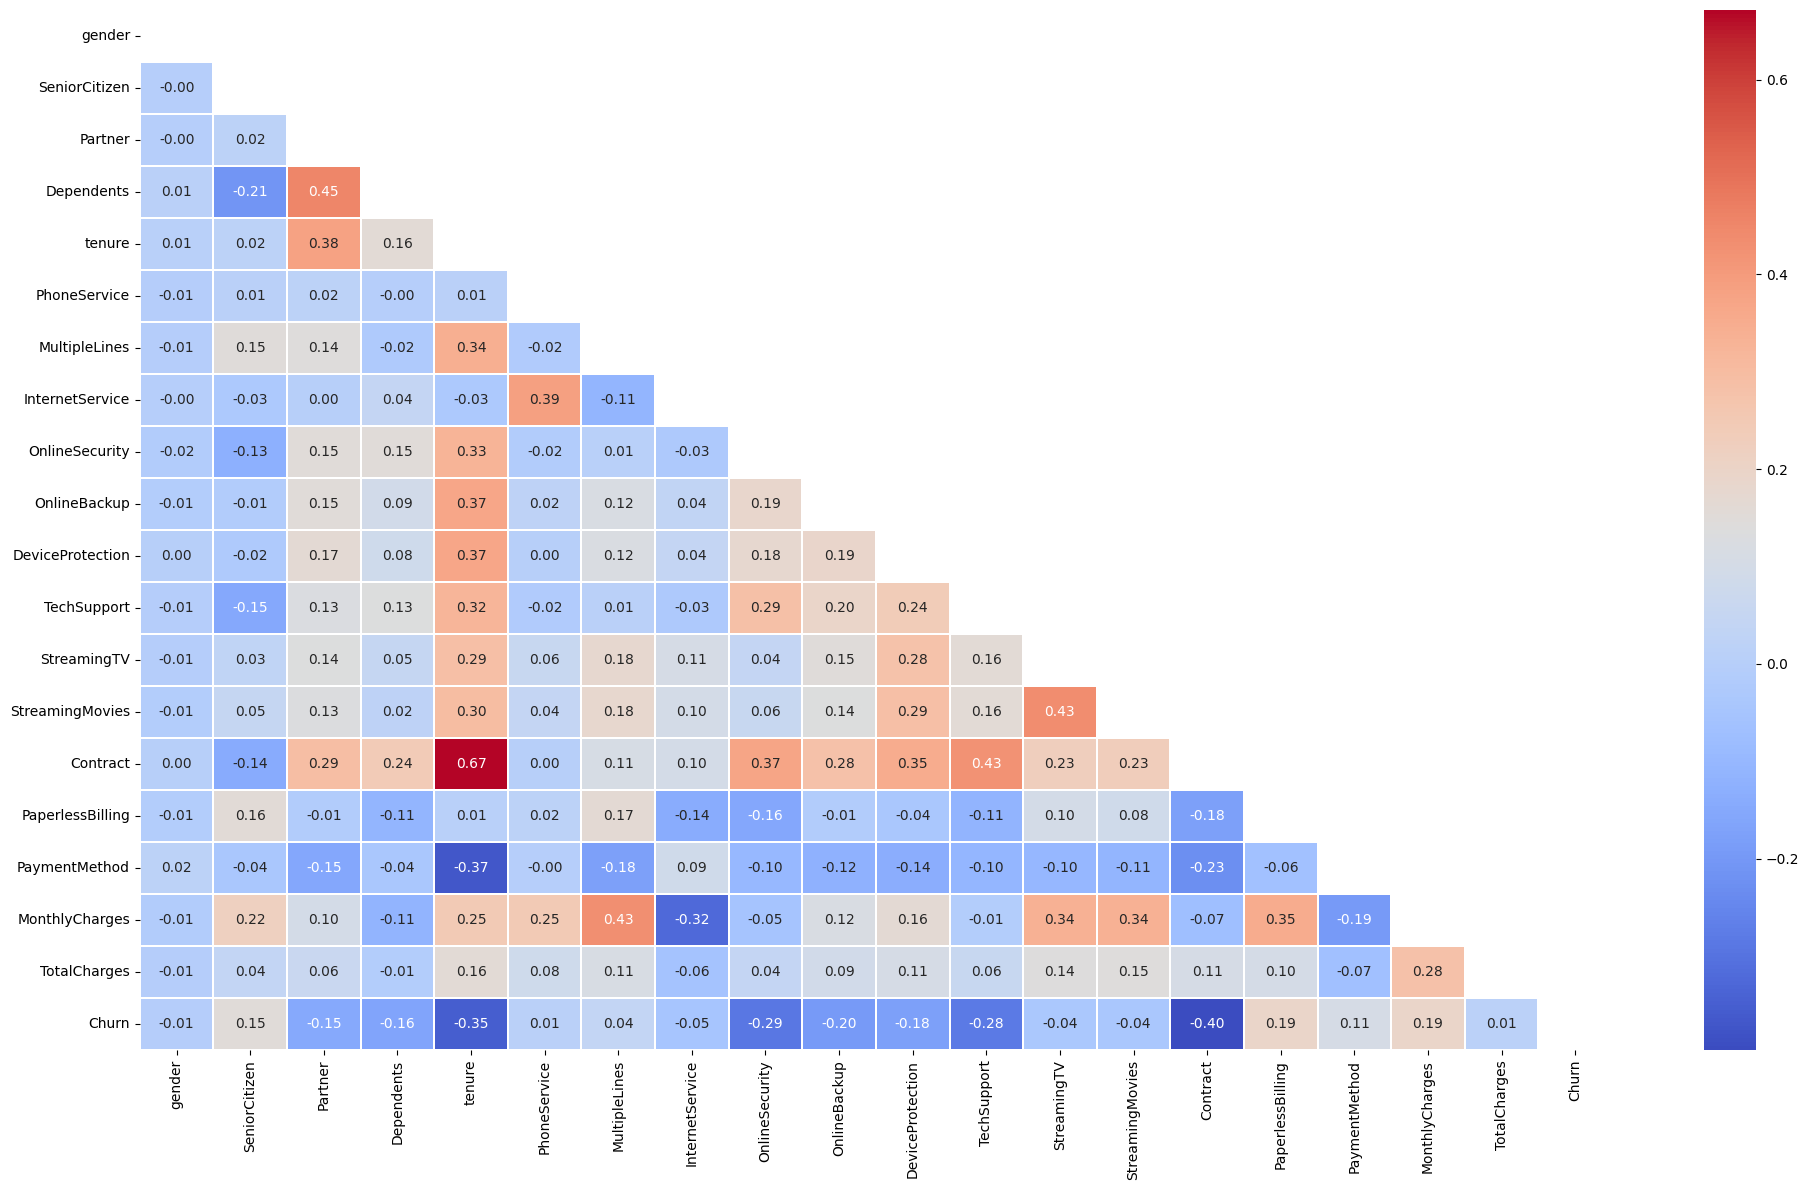

In [17]:
df_corr = df
df_corr = df_corr.corr()

plt.figure(figsize=(20,12))
sns.heatmap(df_corr, linewidths=0.1, annot=True, fmt = ".2f", cmap = 'coolwarm', mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.tight_layout()
plt.show()

In [36]:
def quality_report(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction, average='weighted'),
        recall_score(actual, prediction, average='weighted'),
        f1_score(actual, prediction, average='weighted')
    ))

In [37]:
X = df.drop(['Churn'], axis=1)
Y = df['Churn']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=52, stratify=Y
)

In [60]:
gbr_model = GradientBoostingClassifier()
gbr_model.fit(x_train, y_train)
gbr_pred = gbr_model.predict(x_test)
print(roc_auc_score(y_test, gbr_model.predict_proba(x_test)[:, 1]))
quality_report(y_test, gbr_pred)

0.8600799152838268
Accuracy: 0.811
Precision: 0.800
Recall: 0.811
f1_score: 0.800


In [43]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)
print(1 - gbr_model.score(x_train, y_train))
print(1 - gbr_model.score(x_test, y_test))

0.6240592202431989
0.6697411039816084


In [49]:
cb = CatBoostClassifier(logging_level='Silent')
cb.fit(x_train, y_train)
cb_pred = cb.predict(x_test)
print(roc_auc_score(y_test, cb.predict_proba(x_test)[:, 1]))
quality_report(y_test, cb_pred)

0.8504505715125787
Accuracy: 0.797
Precision: 0.786
Recall: 0.797
f1_score: 0.788


In [59]:
cb = CatBoostRegressor(logging_level='Silent')
cb.fit(x_train, y_train)
cb_pred = cb.predict(x_test)

print(1 - cb.score(x_train, y_train))
print(1 - cb.score(x_test, y_test))

0.38180400754741073
0.7079205164960971


In [54]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)

print(roc_auc_score(y_test, lgbm.predict_proba(x_test)[:, 1]))
quality_report(y_test, lgbm_pred)

0.847625741955639
Accuracy: 0.798
Precision: 0.789
Recall: 0.798
f1_score: 0.792


In [58]:
lgbm = LGBMRegressor(verbose=-1)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)

print(1 - lgbm.score(x_train, y_train))
print(1 - lgbm.score(x_test, y_test))

# print(roc_auc_score(y_test, lgbm.predict_proba(x_test)[:, 1]))
# quality_report(y_test, lgbm_pred)

0.4358397326714569
0.6949717537877763


In [66]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = cb.predict(x_test)

print(1 - xgb.score(x_train, y_train))
print(1 - xgb.score(x_test, y_test))
print(roc_auc_score(y_test, xgb.predict_proba(x_test)[:, 1]))

0.0486815415821501
0.2181732134406058
0.8294966416744768


In [70]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

print(1 - xgb.score(x_train, y_train))
print(1 - xgb.score(x_test, y_test))

0.1771051287651062
0.8070577383041382


In [76]:
gbm = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, verbose=True).fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0700            2.49s
         2           1.0060            2.36s
         3           0.9648            2.14s
         4           0.9327            2.15s
         5           0.9102            2.25s
         6           0.8900            2.28s
         7           0.8772            3.05s
         8           0.8641            2.96s
         9           0.8540            2.92s
        10           0.8456            2.93s
        20           0.8025            2.61s
        30           0.7801            2.28s
        40           0.7662            2.04s
        50           0.7533            1.88s
        60           0.7386            1.74s
        70           0.7242            1.61s
        80           0.7113            1.51s
        90           0.6990            1.40s
       100           0.6879            1.30s
       200           0.6002            0.41s


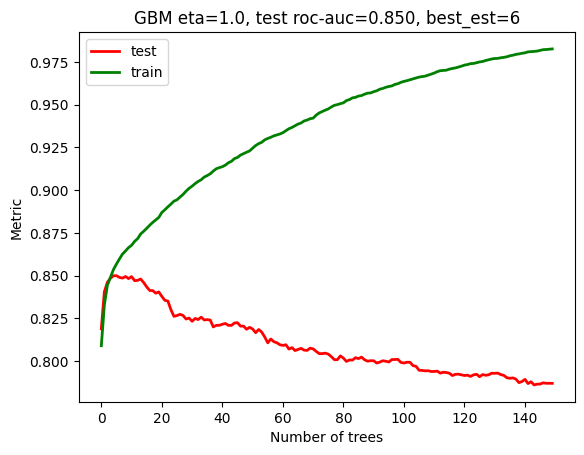

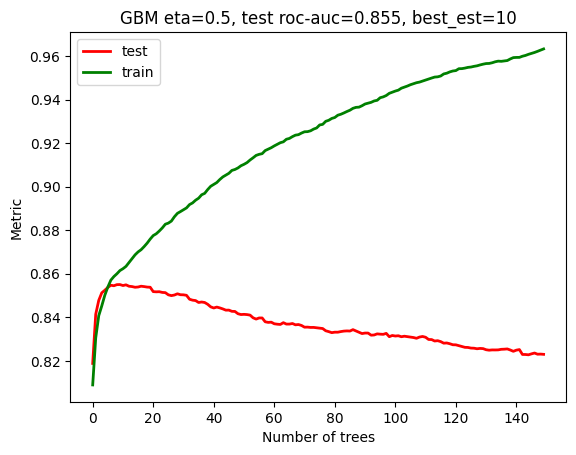

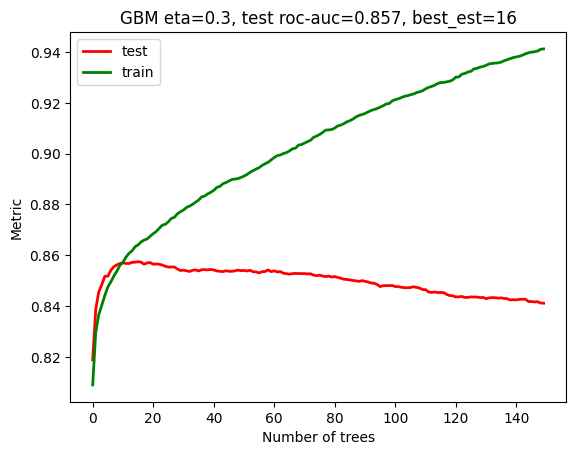

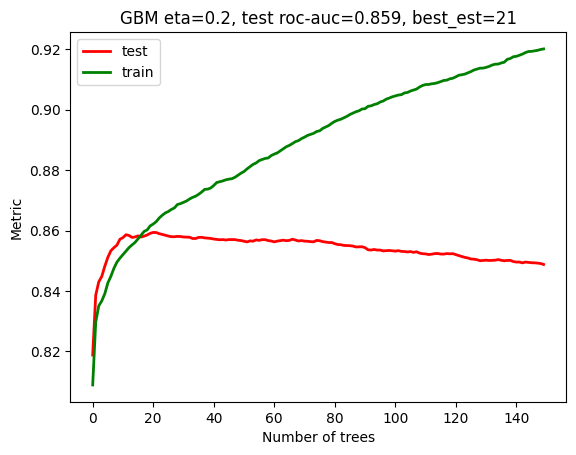

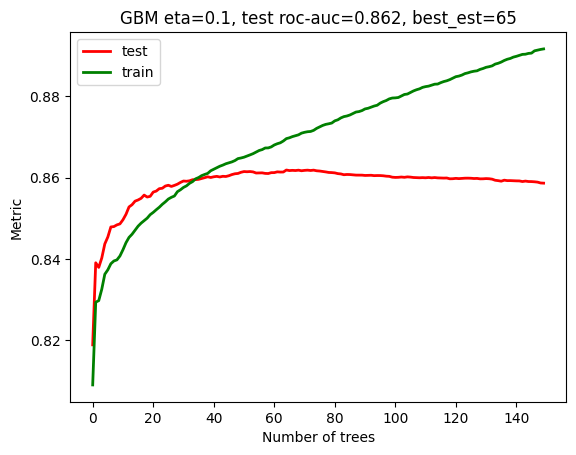

In [73]:
from sklearn.metrics import roc_auc_score

for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:

    gbm = GradientBoostingClassifier(n_estimators=150, learning_rate=learning_rate, random_state=241).fit(x_train, y_train)
    
    l = roc_auc_score

    test_deviance = np.zeros((gbm.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbm.staged_decision_function(x_test)):
        y_pred = 1.0 / (1.0 + np.exp(-y_pred))
        test_deviance[i] = roc_auc_score(y_test, y_pred)
    
    train_deviance = np.zeros((gbm.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbm.staged_decision_function(x_train)):
        y_pred = 1.0 / (1.0 + np.exp(-y_pred))
        train_deviance[i] = roc_auc_score(y_train, y_pred)

    plt.figure()
    plt.plot(test_deviance, 'r', linewidth=2)
    plt.plot(train_deviance, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    plt.title('GBM eta=%.1f, test roc-auc=%.3f, best_est=%d' % (learning_rate, test_deviance.max(), test_deviance.argmax()+1))
    plt.xlabel('Number of trees')
    plt.ylabel('Metric')

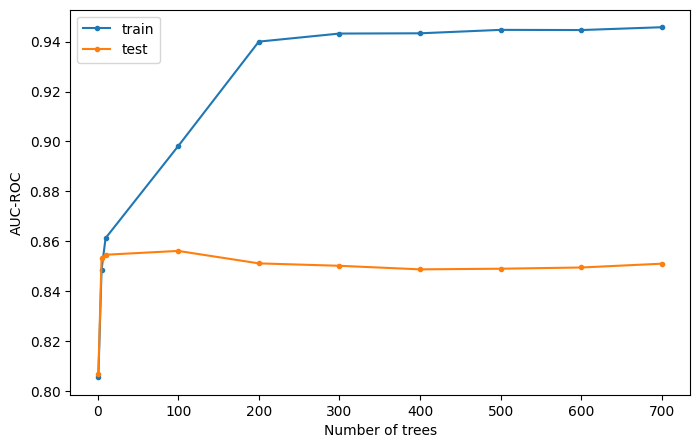

In [79]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
    clf = CatBoostClassifier(iterations=n, logging_level='Silent')
    clf.fit(x_train, y_train)
    q_train = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
    q_test = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

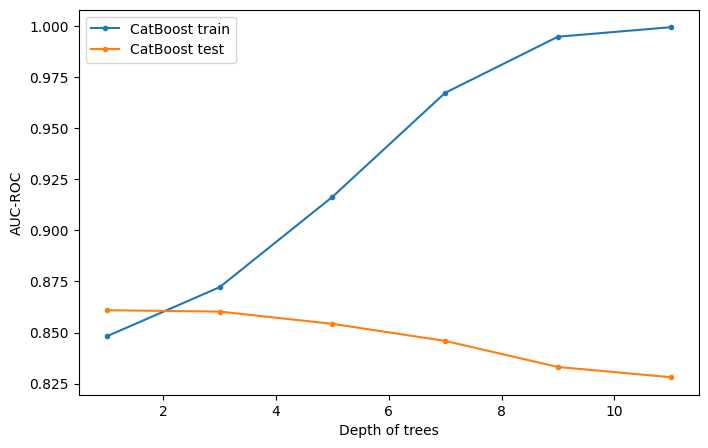

In [83]:
depth = list(range(1, 12, 2))
n_trees = 300
quals_cat_train = []
quals_cat_test = []
for d in depth:
    clf = CatBoostClassifier(n_estimators=n_trees, max_depth=d, logging_level="Silent")
    clf.fit(x_train, y_train)
    q_train = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
    q_test = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    quals_cat_train.append(q_train)
    quals_cat_test.append(q_test)
    
plt.figure(figsize=(8, 5))
plt.plot(depth, quals_cat_train, marker='.', label='CatBoost train')
plt.plot(depth, quals_cat_test, marker='.', label='CatBoost test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

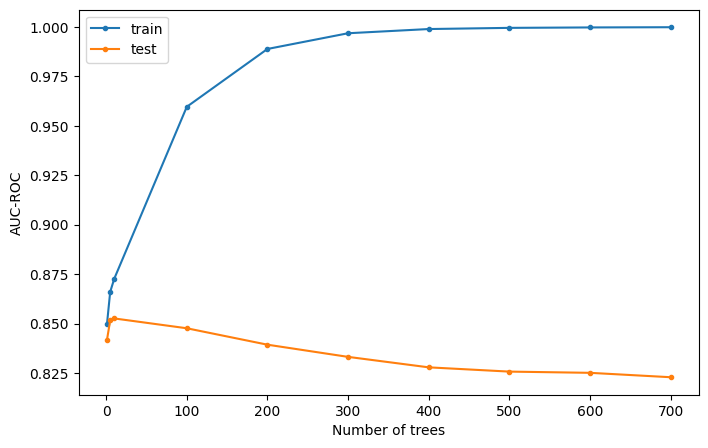

In [80]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
    clf = LGBMClassifier(n_estimators=n, verbose=-1)
    clf.fit(x_train, y_train)
    q_train = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
    q_test = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

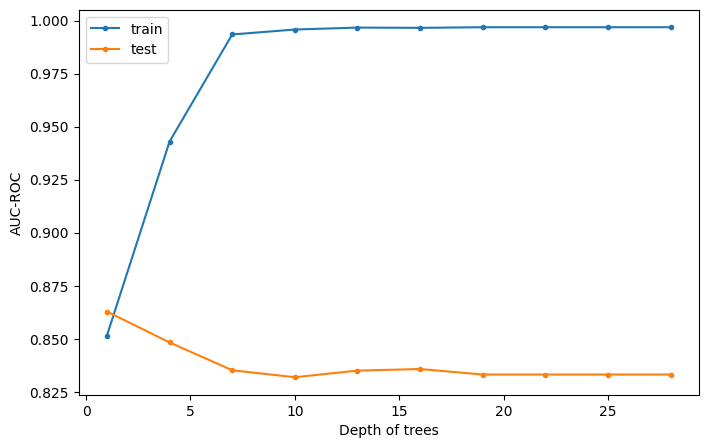

In [82]:
depth = list(range(1, 30, 3))
n_trees = 300
quals_train = []
quals_test = []
for d in depth:
    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d, verbose=-1)
    lgb.fit(x_train, y_train)
    q_train = roc_auc_score(y_train, lgb.predict_proba(x_train)[:, 1])
    q_test = roc_auc_score(y_test, lgb.predict_proba(x_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)
    
plt.figure(figsize=(8, 5))
plt.plot(depth, quals_train, marker='.', label='train')
plt.plot(depth, quals_test, marker='.', label='test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

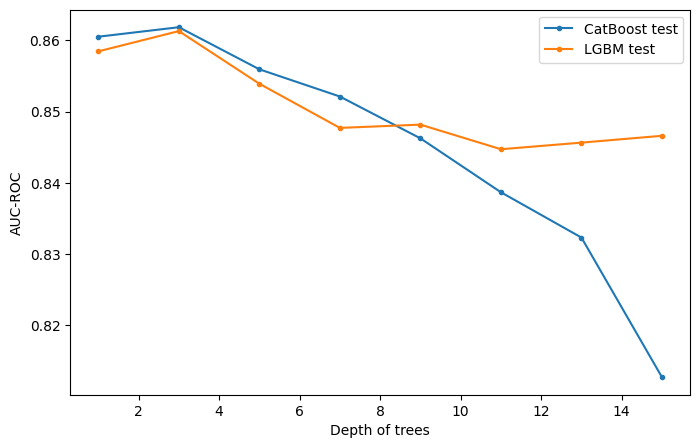

In [86]:
depth = list(range(1, 16, 2))
n_trees = 100
quals_cat_train = []
quals_cat_test = []
quals_lgbm_train = []
quals_lgbm_test = []
for d in depth:
    clf = CatBoostClassifier(n_estimators=n_trees, max_depth=d, logging_level="Silent")
    clf.fit(x_train, y_train)
    q_cat_train = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
    q_cat_test = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    quals_cat_train.append(q_cat_train)
    quals_cat_test.append(q_cat_test)

    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d, verbose=-1)
    lgb.fit(x_train, y_train)
    q_lgbm_train = roc_auc_score(y_train, lgb.predict_proba(x_train)[:, 1])
    q_lgbm_test = roc_auc_score(y_test, lgb.predict_proba(x_test)[:, 1])
    quals_lgbm_train.append(q_lgbm_train)
    quals_lgbm_test.append(q_lgbm_test)
    
plt.figure(figsize=(8, 5))
# plt.plot(depth, quals_train, marker='.', label='train')
plt.plot(depth, quals_cat_test, marker='.', label='CatBoost test')
plt.plot(depth, quals_lgbm_test, marker='.', label='LGBM test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

In [87]:
print(f'{np.max(quals_cat_test):.3f}')

0.862


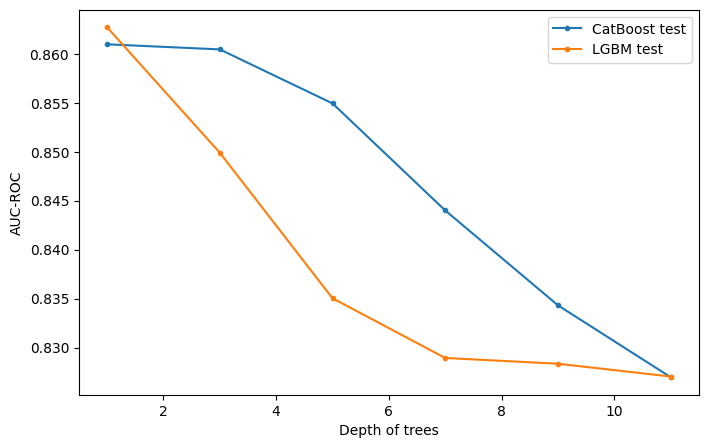

In [89]:
depth = list(range(1, 12, 2))
n_trees = 500
quals_cat_train = []
quals_cat_test = []
quals_lgbm_train = []
quals_lgbm_test = []
for d in depth:
    clf = CatBoostClassifier(n_estimators=n_trees, max_depth=d, logging_level="Silent")
    clf.fit(x_train, y_train)
    q_cat_train = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
    q_cat_test = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    quals_cat_train.append(q_cat_train)
    quals_cat_test.append(q_cat_test)

    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d, verbose=-1)
    lgb.fit(x_train, y_train)
    q_lgbm_train = roc_auc_score(y_train, lgb.predict_proba(x_train)[:, 1])
    q_lgbm_test = roc_auc_score(y_test, lgb.predict_proba(x_test)[:, 1])
    quals_lgbm_train.append(q_lgbm_train)
    quals_lgbm_test.append(q_lgbm_test)
    
plt.figure(figsize=(8, 5))
# plt.plot(depth, quals_train, marker='.', label='train')
plt.plot(depth, quals_cat_test, marker='.', label='CatBoost test')
plt.plot(depth, quals_lgbm_test, marker='.', label='LGBM test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

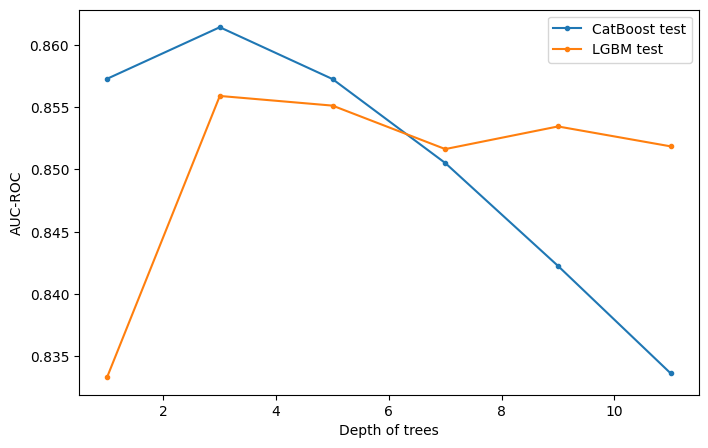

In [90]:
depth = list(range(1, 12, 2))
n_trees = 20
quals_cat_train = []
quals_cat_test = []
quals_lgbm_train = []
quals_lgbm_test = []
for d in depth:
    clf = CatBoostClassifier(n_estimators=n_trees, max_depth=d, logging_level="Silent")
    clf.fit(x_train, y_train)
    q_cat_train = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
    q_cat_test = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
    quals_cat_train.append(q_cat_train)
    quals_cat_test.append(q_cat_test)

    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d, verbose=-1)
    lgb.fit(x_train, y_train)
    q_lgbm_train = roc_auc_score(y_train, lgb.predict_proba(x_train)[:, 1])
    q_lgbm_test = roc_auc_score(y_test, lgb.predict_proba(x_test)[:, 1])
    quals_lgbm_train.append(q_lgbm_train)
    quals_lgbm_test.append(q_lgbm_test)
    
plt.figure(figsize=(8, 5))
# plt.plot(depth, quals_train, marker='.', label='train')
plt.plot(depth, quals_cat_test, marker='.', label='CatBoost test')
plt.plot(depth, quals_lgbm_test, marker='.', label='LGBM test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

In [92]:
np.max(quals_cat_test)

0.8614076253744235

In [93]:
np.max(quals_lgbm_test)

0.8558952165683518